In [51]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: monikas03
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes


100%|██████████| 79.2M/79.2M [00:02<00:00, 40.1MB/s]


In [5]:
path = '/content/crop-and-weed-detection-data-with-bounding-boxes/agri_data/data'

In [6]:
data = [os.path.join(path,x) for x in os.listdir(path)]

In [7]:
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]

In [8]:
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

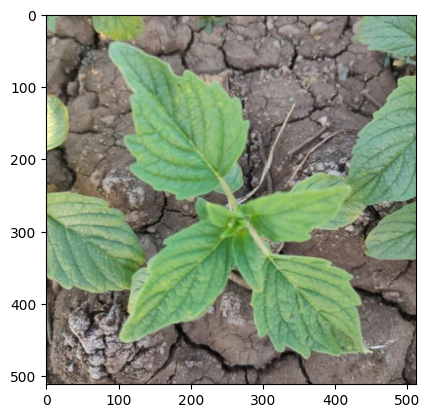

In [9]:
plt.imshow(cv2.cvtColor(cv2.imread(images[20]),cv2.COLOR_BGR2RGB))

In [10]:
df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h'])
i=0
for id in tqdm(images):
    label = open(id[:-5]+'.txt','r')
    a = label.read()
    label.close()
    label = a.split('\n')
    cleaned_label = label[:-1]

    for name in cleaned_label:
        ind_label = name.split(' ')
        df.loc[i,'image_name'] = id[73:]
        df.loc[i,'object'] = int(ind_label[0])
        df.loc[i,'x_cen'] = float(ind_label[1])
        df.loc[i,'y_cen'] = float(ind_label[2])
        df.loc[i,'w'] = float(ind_label[3])
        df.loc[i,'h'] = float(ind_label[4])
        i += 1

100%|██████████| 1300/1300 [00:05<00:00, 244.17it/s]


In [11]:
len(df)

2072

In [12]:
df

,image_name,object,x_cen,y_cen,w,h
0,agri_0_7865.jpeg,1,0.510742,0.613281,0.669922,0.683594
1,agri_0_4016.jpeg,1,0.499023,0.483398,0.814453,0.958984
2,agri_0_4184.jpeg,1,0.367188,0.582031,0.644531,0.394531
3,agri_0_4184.jpeg,1,0.193359,0.182617,0.363281,0.349609
4,agri_0_3720.jpeg,0,0.657227,0.49707,0.076172,0.060547
...,...,...,...,...,...,...
2067,agri_0_4645.jpeg,0,0.503906,0.487305,0.664062,0.880859
2068,agri_0_2551.jpeg,0,0.501953,0.512695,0.960938,0.470703
2069,agri_0_4561.jpeg,0,0.522461,0.474609,0.955078,0.847656
2070,agri_0_9492.jpeg,0,0.491211,0.49707,0.822266,0.982422


In [13]:
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

In [14]:
pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):

    pascal_voc.loc[i,'filename'] = df.loc[i,'image_name']
    pascal_voc.loc[i,'width'] = 512
    pascal_voc.loc[i,'height']= 512
    if df.loc[i,'object'] == 0:
        pascal_voc.loc[i,'class'] = 'crop'
    else:
        pascal_voc.loc[i,'class'] = 'weed'
    pascal_voc.loc[i,'xmin']  = int((df.loc[i,'x_cen'] - df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymin']  = int((df.loc[i,'y_cen'] - df.loc[i,'h']/2)*512)
    pascal_voc.loc[i,'xmax']  = int((df.loc[i,'x_cen'] + df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymax']  = int((df.loc[i,'y_cen'] + df.loc[i,'h']/2)*512)

100%|██████████| 2072/2072 [00:06<00:00, 316.04it/s]


In [15]:
pascal_voc

,filename,width,height,class,xmin,ymin,xmax,ymax
0,agri_0_7865.jpeg,512,512,weed,89,138,432,488
1,agri_0_4016.jpeg,512,512,weed,46,1,463,492
2,agri_0_4184.jpeg,512,512,weed,23,196,353,398
3,agri_0_4184.jpeg,512,512,weed,5,4,191,182
4,agri_0_3720.jpeg,512,512,crop,317,238,356,269
...,...,...,...,...,...,...,...,...
2067,agri_0_4645.jpeg,512,512,crop,87,24,427,475
2068,agri_0_2551.jpeg,512,512,crop,10,141,503,382
2069,agri_0_4561.jpeg,512,512,crop,23,25,512,459
2070,agri_0_9492.jpeg,512,512,crop,40,2,462,505


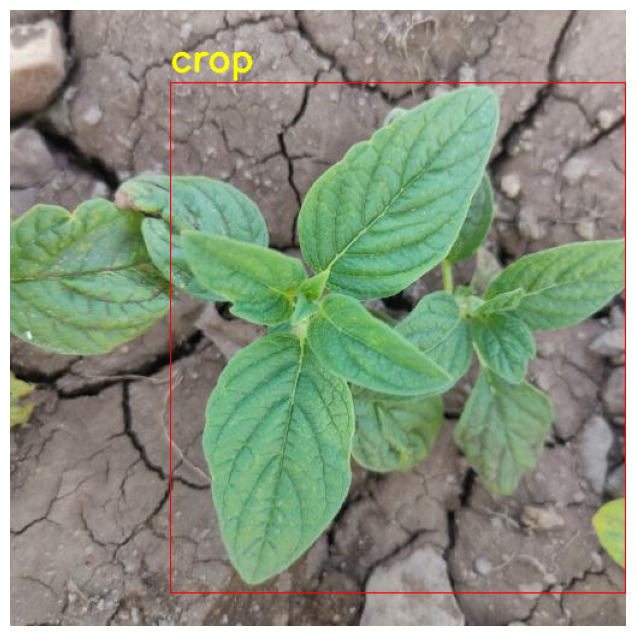

In [16]:
any_index_number = 55 #change this number for different images
image_path = os.path.join(path, pascal_voc.loc[any_index_number, 'filename'])
img = cv2.imread(image_path)
test_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
test_df = pascal_voc[pascal_voc['filename']==pascal_voc.loc[any_index_number,'filename']].reset_index(drop=True)
for i in range(len(test_df)):

    rec = cv2.rectangle(test_image, (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']), (test_df.loc[i,'xmax'],test_df.loc[i,'ymax']), (255,0,0), 1, 1)
    text = cv2.putText(rec, test_df.loc[i,'class'], (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']-10), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)

plt.figure(figsize=(8,8))
plt.imshow(text)
plt.axis('off')
plt.show()

In [17]:
pascal_voc.to_csv('pascal_voc_format.csv',index=False)

In [18]:
df = pd.read_csv(r"pascal_voc_format.csv")

In [19]:
df.head(10)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,agri_0_7865.jpeg,512,512,weed,89,138,432,488
1,agri_0_4016.jpeg,512,512,weed,46,1,463,492
2,agri_0_4184.jpeg,512,512,weed,23,196,353,398
3,agri_0_4184.jpeg,512,512,weed,5,4,191,182
4,agri_0_3720.jpeg,512,512,crop,317,238,356,269
5,agri_0_3720.jpeg,512,512,crop,352,172,391,204
6,agri_0_3720.jpeg,512,512,crop,324,199,361,232
7,agri_0_3720.jpeg,512,512,crop,316,40,364,144
8,agri_0_3720.jpeg,512,512,crop,111,205,169,254
9,agri_0_3720.jpeg,512,512,crop,144,288,185,321


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2072 non-null   object
 1   width     2072 non-null   int64 
 2   height    2072 non-null   int64 
 3   class     2072 non-null   object
 4   xmin      2072 non-null   int64 
 5   ymin      2072 non-null   int64 
 6   xmax      2072 non-null   int64 
 7   ymax      2072 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 129.6+ KB


16it [00:00, 35.90it/s]


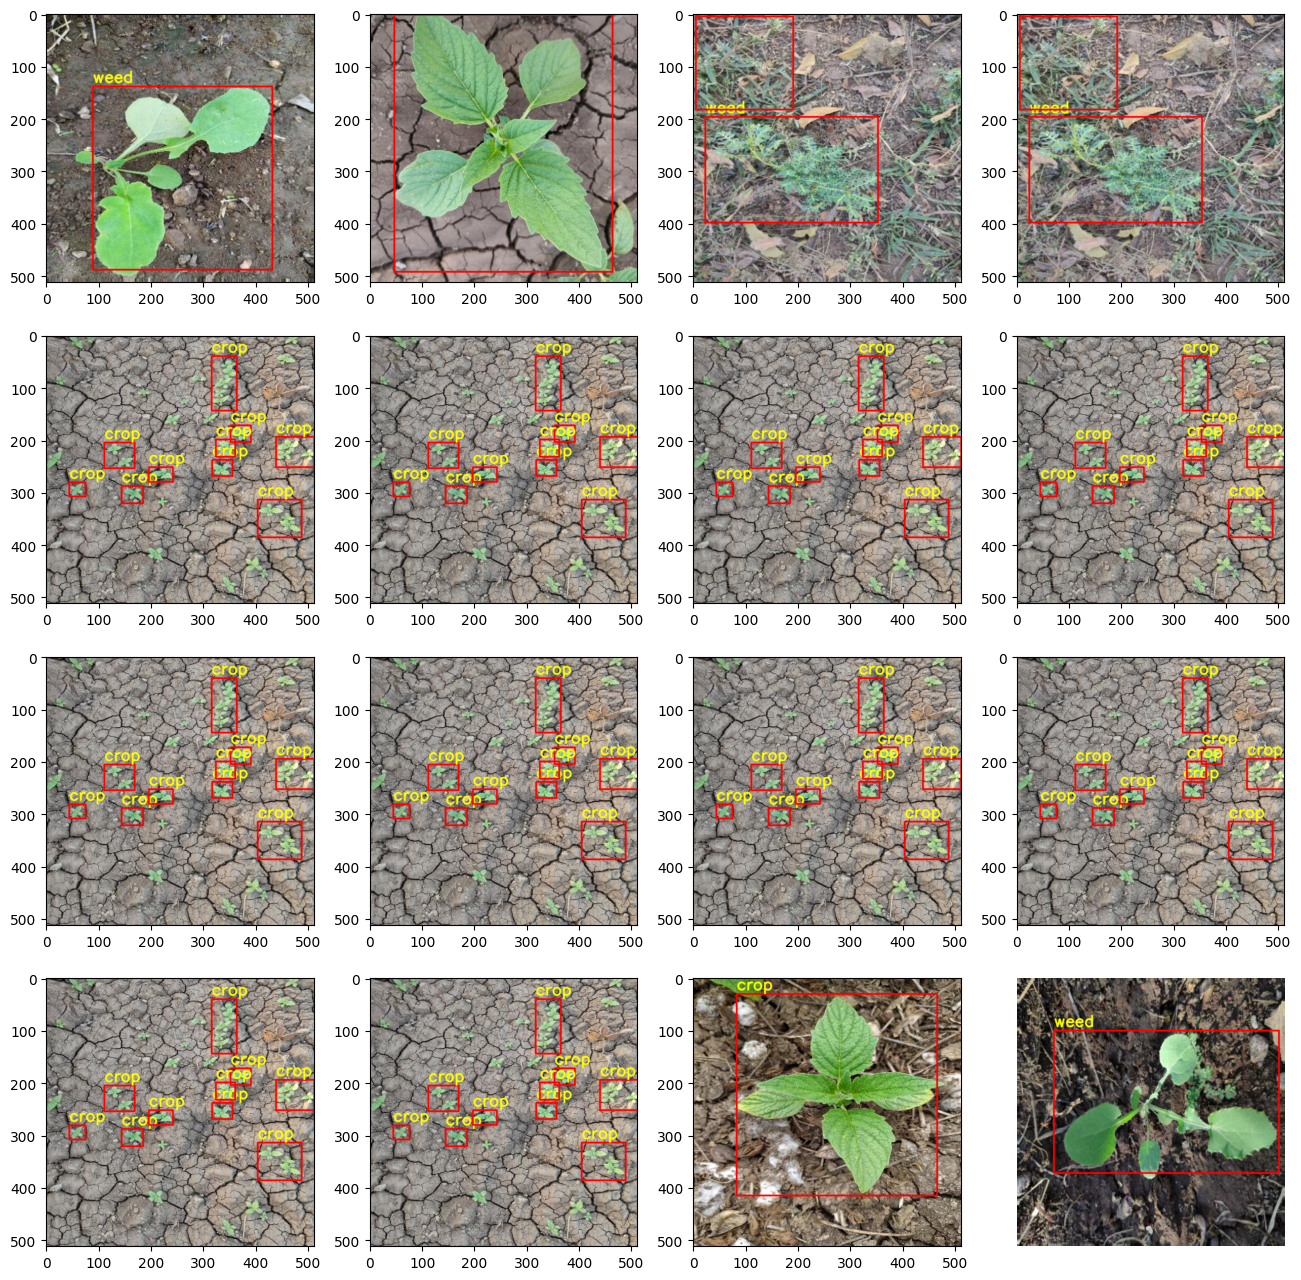

In [21]:
_ , axes = plt.subplots(4,4,figsize=(16,16))
for i,ax in tqdm(zip(range(16),axes.flat)):
    temp_df = df[df['filename']==pascal_voc.loc[i,'filename']].reset_index(drop=True)
    image_path = os.path.join(path, pascal_voc.loc[i, 'filename'])
    img = cv2.imread(image_path)
    # temp_img = cv2.imread(path+folder_images[i])
    temp_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for j in range(len(temp_df)):
        rect = cv2.rectangle(temp_img,(temp_df.loc[j,'xmin'],temp_df.loc[j,'ymin']),(temp_df.loc[j,'xmax'],temp_df.loc[j,'ymax']),(255,0,0),2,cv2.LINE_AA)
        rect_text = cv2.putText(rect,temp_df.loc[j,'class'],(temp_df.loc[j,'xmin'],temp_df.loc[j,'ymin']-8), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    ax.imshow(rect_text)
    plt.axis('off')

In [22]:
import keras
keras.__version__
from keras import layers
from keras import models
from keras import optimizers

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 75, 75, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 37, 37, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 18, 18, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,478,978 (81.94 MB)

 Trainable params: 21,477,506 (81.93 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [24]:
import os
import shutil
import random
import time

# Define directories
base_dir = '/content/crop-and-weed-detection-data-with-bounding-boxes/agri_data/data'  # Base directory where images, labels, and train, validation, and test folders are located
source_dir = base_dir  # Directory where the images and YOLO labels are located
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Create class directories in train, validation, and test directories
classes = {'0': 'weed', '1': 'crop'}  # Define classes

# Ensure the class directories are created in each split directory
for split_dir in [train_dir, validation_dir, test_dir]:
    for class_name in classes.values():
        os.makedirs(os.path.join(split_dir, class_name), exist_ok=True)
print("Files in source directory:", os.listdir(source_dir))
txt_files = [file for file in os.listdir(source_dir) if file.lower().endswith('.txt')]
print("Label files found:", txt_files)
# Get list of image-label pairs
image_label_pairs = [(file.replace('.txt', '.jpeg'), file) for file in os.listdir(source_dir) if file.endswith('.txt')]

# Shuffle the list to ensure random distribution
random.shuffle(image_label_pairs)

# Calculate split indices
total_count = len(image_label_pairs)
train_count = int(0.7 * total_count)
validation_count = int(0.2 * total_count)
test_count = total_count - train_count - validation_count

# Split the list into train, validation, and test sets
train_pairs = image_label_pairs[:train_count]
validation_pairs = image_label_pairs[train_count:train_count + validation_count]
test_pairs = image_label_pairs[train_count + validation_count:]

# Function to copy and then remove images based on YOLO labels with retry mechanism
def copy_and_remove_images_based_on_labels(pairs, dest_dir):
    for image_file, label_file in pairs:
        label_path = os.path.join(source_dir, label_file)
        image_path = os.path.join(source_dir, image_file)

        # Read the label file to get the class
        if os.path.isfile(label_path):
            with open(label_path, 'r') as f:
                lines = f.readlines()
                f.close()
                for line in lines:
                    parts = line.strip().split()
                    class_id = parts[0]
                    if class_id in classes:
                        class_name = classes[class_id]
                        dest_class_dir = os.path.join(dest_dir, class_name)

                        # Copy the image file
                        if os.path.isfile(image_path):
                            print(f"Copying image file: {image_path} to {dest_class_dir}")
                            shutil.copy2(image_path, os.path.join(dest_class_dir, image_file))
                            retry_count = 5
                            while retry_count > 0:
                                try:
                                    os.remove(image_path)
                                    break
                                except PermissionError:
                                    retry_count -= 1
                                    time.sleep(1)
                                    if retry_count == 0:
                                        print(f"Failed to remove image file: {image_path} after several retries")
                        else:
                            print(f"Image file not found: {image_path}")

                        # Copy the label file
                        print(f"Copying label file: {label_path} to {dest_class_dir}")
                        shutil.copy2(label_path, os.path.join(dest_class_dir, label_file))
                        retry_count = 5
                        while retry_count > 0:
                            try:
                                os.remove(label_path)
                                break
                            except PermissionError:
                                retry_count -= 1
                                time.sleep(1)
                                if retry_count == 0:
                                    print(f"Failed to remove label file: {label_path} after several retries")
                        break  # Assumes one class per file
        else:
            print(f"Label file not found: {label_path}")

# Move images and labels to train, validation, and test directories
copy_and_remove_images_based_on_labels(train_pairs, train_dir)
copy_and_remove_images_based_on_labels(validation_pairs, validation_dir)
copy_and_remove_images_based_on_labels(test_pairs, test_dir)

Files in source directory: ['agri_0_301.txt', 'agri_0_7865.jpeg', 'agri_0_4016.jpeg', 'agri_0_8618.txt', 'agri_0_6572.txt', 'agri_0_4184.jpeg', 'agri_0_3720.jpeg', 'agri_0_8165.txt', 'agri_0_1960.jpeg', 'agri_0_7201.jpeg', 'agri_0_3706.txt', 'agri_0_9701.jpeg', 'agri_0_5634.txt', 'agri_0_8546.jpeg', 'agri_0_1320.txt', 'agri_0_8752.jpeg', 'agri_0_4753.txt', 'agri_0_5593.txt', 'agri_0_6112.jpeg', 'agri_0_3346.txt', 'agri_0_352.txt', 'agri_0_5118.jpeg', 'agri_0_9354.jpeg', 'agri_0_7629.txt', 'agri_0_6481.jpeg', 'agri_0_2441.txt', 'agri_0_4945.jpeg', 'agri_0_4540.jpeg', 'agri_0_7579.txt', 'agri_0_3647.jpeg', 'agri_0_5512.jpeg', 'agri_0_935.txt', 'agri_0_4125.jpeg', 'agri_0_3234.txt', 'agri_0_8421.txt', 'agri_0_2971.jpeg', 'agri_0_5736.txt', 'agri_0_4337.txt', 'agri_0_8315.txt', 'agri_0_4484.txt', 'agri_0_4785.jpeg', 'agri_0_9526.txt', 'agri_0_6978.jpeg', 'agri_0_4508.jpeg', 'agri_0_7958.jpeg', 'agri_0_5880.jpeg', 'agri_0_9933.jpeg', 'agri_0_667.jpeg', 'agri_0_8073.jpeg', 'agri_0_4034.jpeg'

In [25]:
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
print("Train directory:", train_dir)
print("Validation directory:", validation_dir)
print("Test directory:", test_dir)

test_datagen = ImageDataGenerator(rescale=1./255)
print(test_datagen)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        # target_size=(512, 512),
        target_size=(10, 10),
        color_mode="rgb",
        batch_size=92,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        # target_size=(512, 512),
        target_size=(150, 150),
        color_mode="rgb",
        batch_size=31,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        # target_size=(512, 512),
        target_size=(150, 150),
        color_mode="rgb",
        batch_size=31,
        class_mode='categorical')

Train directory: /content/crop-and-weed-detection-data-with-bounding-boxes/agri_data/data/train
Validation directory: /content/crop-and-weed-detection-data-with-bounding-boxes/agri_data/data/validation
Test directory: /content/crop-and-weed-detection-data-with-bounding-boxes/agri_data/data/test
Found 909 images belonging to 2 classes.
Found 260 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


In [76]:
import math

# Number of training and validation samples
training_samples = 909
batch_size_training_generator = 16
validation_samples = 260
batch_size_validation_generator = 8

# Using model.fit instead of model.fit_generator
history = model.fit(
    train_generator,
    steps_per_epoch=math.ceil(training_samples / batch_size_training_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=math.ceil(validation_samples / batch_size_validation_generator)
)

Epoch 1/15
10/57 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.8837 - loss: 0.3066

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - accuracy: 0.8753 - loss: 0.3227 - val_accuracy: 0.5577 - val_loss: 0.7136
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 152ms/step - accuracy: 0.8791 - loss: 0.3277 - val_accuracy: 0.6577 - val_loss: 0.6526
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.8754 - loss: 0.3092 - val_accuracy: 0.6115 - val_loss: 0.6823
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 146ms/step - accuracy: 0.8826 - loss: 0.3021 - val_accuracy: 0.5692 - val_loss: 0.7290
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - accuracy: 0.8639 - loss: 0.3334 - val_accuracy: 0.6038 - val_loss: 0.6751
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - accuracy: 0.8913 - loss: 0.2855 - val_accuracy: 0.7269 - val_loss: 0.5938
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - accuracy: 0.8590 - loss: 0.3459 - val_accuracy: 0.6962 - val_loss: 0.6008
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - accuracy: 0.8845 - loss: 0.3163 - val_accuracy: 0.711

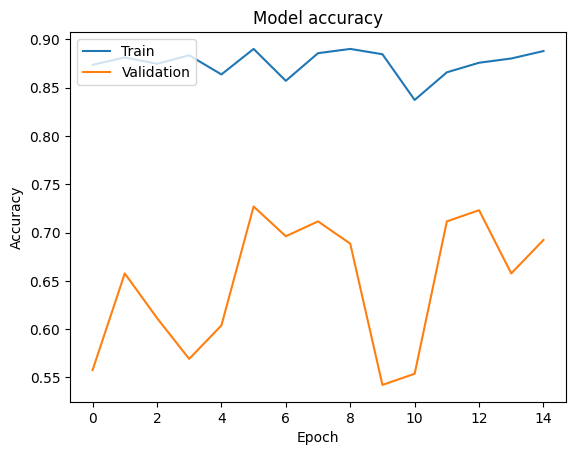

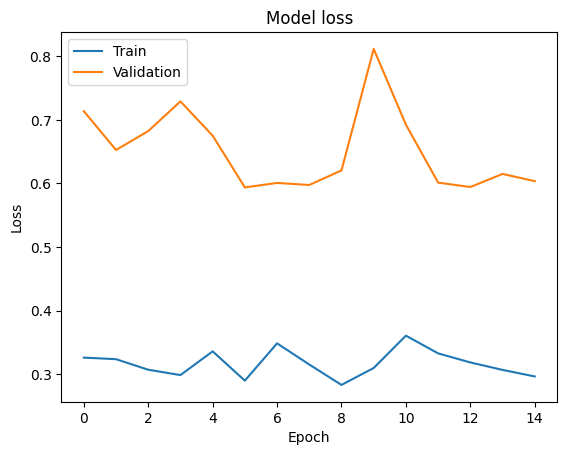

In [77]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [78]:
import math

# Define the number of test samples and batch size
test_samples = 131
batch_size_test = 16

# Evaluate the model using the test generator
score = model.evaluate(test_generator, steps=math.ceil(test_samples / batch_size_test))

# Print the evaluation metrics
print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 481ms/step - accuracy: 0.6724 - loss: 0.6565
Test Loss: 0.6635
Test Accuracy: 0.6641


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 968ms/step
Classification Report:
              precision    recall  f1-score   support

        crop       0.54      0.74      0.62        74
        weed       0.34      0.18      0.23        57

    accuracy                           0.50       131
   macro avg       0.44      0.46      0.43       131
weighted avg       0.45      0.50      0.45       131



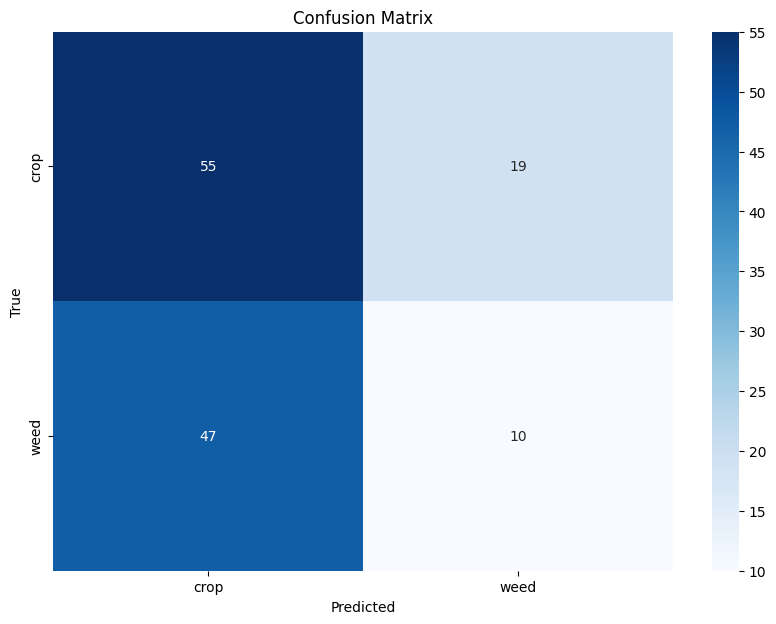

In [79]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions from the model
test_predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(test_predictions, axis=1)

# True labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Names of the classes

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Classification Report
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels)

# Print the classification report
print("Classification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()